### Pytorch

Pytorch is an [open source](https://github.com/pytorch/pytorch) machine learning and deep learning framework. It allows us to easily define and train complex deep neural networks and process data.

Installation: https://pytorch.org/get-started/locally/

Contents
- Tensors and tensor operations
- Autograd
- Building a simple linear regression model
- Building a simple neural network for classification

Remember - when in doubt, [the documentation](https://pytorch.org/docs/stable/index.html#) is your best friend! Don't be afraid to google things when you get stuck either.

### Working with tensors

Tensors are a specialized data structure that are very similar to arrays and matrices. In PyTorch, we use tensors to encode the inputs and outputs of a model, as well as the model's parameters.

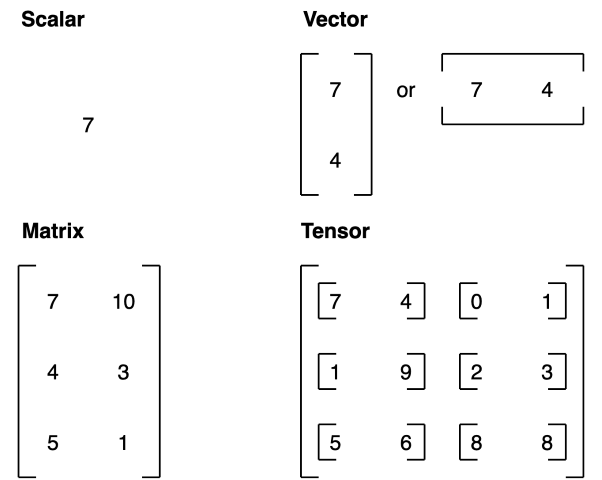

In [ ]:
import torch # Importing the pytorch library
import numpy as np

#### Initializing tensors

In [ ]:
scalar = torch.tensor(5)
print(scalar)

tensor(5)


In [ ]:
print(f"The tensor has {scalar.ndim} dimensions and shape {scalar.shape}")

The tensor has 0 dimensions and shape torch.Size([])


In [ ]:
vector = torch.tensor([1, 2, 3, 4, 5])
print(f"{vector} has {vector.ndim} dimension and shape {vector.shape}")

tensor([1, 2, 3, 4, 5]) has 1 dimension and shape torch.Size([5])


In [ ]:
matrix = torch.tensor([[1, 2, 3], [4, 5, 6]])
print(f"{matrix} has {matrix.ndim} dimension and shape {matrix.shape}")

tensor([[1, 2, 3],
        [4, 5, 6]]) has 2 dimension and shape torch.Size([2, 3])


In [ ]:
tensor = torch.tensor([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])
print(f"{tensor} has {tensor.ndim} dimension and shape {tensor.shape}")

tensor([[[ 1,  2,  3],
         [ 4,  5,  6]],

        [[ 7,  8,  9],
         [10, 11, 12]]]) has 3 dimension and shape torch.Size([2, 2, 3])


What is the shape of the tensor given below?

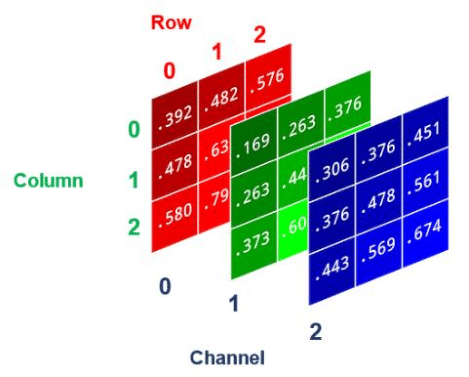

In [ ]:
# Other ways of initializing tensors
random_tensor = torch.rand((3, 4)) # Sampled from a uniform distribution [0, 1)
random_tensor_2 = torch.randn((3, 4)) # Sampled from a normal distribution with mean 0 and std 1
zeros_tensor = torch.zeros((3, 4))
ones_tensor = torch.ones((3, 4))
print(f"torch.rand output: \n{random_tensor}\n")
print(f"torch.randn output: \n{random_tensor_2}\n")
print(f"torch.zeros output: \n{zeros_tensor}\n")
print(f"torch.ones output: \n{ones_tensor}\n")

torch.rand output: 
tensor([[0.4284, 0.0910, 0.4952, 0.0077],
        [0.3007, 0.1072, 0.6972, 0.3937],
        [0.9728, 0.8088, 0.3401, 0.4746]])

torch.randn output: 
tensor([[-0.7747,  1.0977, -0.6638,  1.1676],
        [ 0.7329, -0.6785,  0.1929,  1.3817],
        [-0.5898,  0.6079,  0.5740,  0.5398]])

torch.zeros output: 
tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

torch.ones output: 
tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])



In [ ]:
# Using torch.arange
step = 4
range_tensor = torch.arange(0.0, 10.0, step)
print(range_tensor)

tensor([0., 4., 8.])


What if I want to create a tensor of the same size as a previously defined tensor?

In [ ]:
print(torch.zeros_like(range_tensor))
print(torch.ones_like(range_tensor))

tensor([0., 0., 0.])
tensor([1., 1., 1.])


[Tensor Datatypes](https://pytorch.org/docs/stable/tensors.html#data-types)

In [ ]:
print(range_tensor.dtype)
print(random_tensor.dtype)

torch.float32
torch.float32


In [ ]:
random_tensor_3 = random_tensor.type(torch.float16) # Try random_tensor.half()
print(random_tensor_3.dtype)

torch.float16


Moving tensors to the GPU

In [ ]:
torch.cuda.is_available()

True

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


In [ ]:
print(f"Before moving to GPU: {random_tensor_3.device}")
random_tensor_3 = random_tensor_3.to('cpu') # Also try random_tensor_3.cuda()
print(f"After moving to GPU: {random_tensor_3.device}")

Before moving to GPU: cuda:0
After moving to GPU: cpu


In [ ]:
random_tensor_3.cuda() # Note that this is not in place

tensor([[0.4285, 0.0911, 0.4951, 0.0077],
        [0.3008, 0.1072, 0.6973, 0.3938],
        [0.9727, 0.8086, 0.3401, 0.4746]], device='cuda:0',
       dtype=torch.float16)

In [ ]:
random_tensor_3

tensor([[0.4285, 0.0911, 0.4951, 0.0077],
        [0.3008, 0.1072, 0.6973, 0.3938],
        [0.9727, 0.8086, 0.3401, 0.4746]], dtype=torch.float16)

The three most common errors you'll face when it comes to dealing with tensors will be with - shape, device, and dtype

In [ ]:
print(f"Original tensor: \n{random_tensor_3}")
print(f"Shape: {random_tensor_3.shape}")
print(f"Device: {random_tensor_3.device}")
print(f"Datatype: {random_tensor_3.dtype}")

Original tensor: 
tensor([[0.4285, 0.0911, 0.4951, 0.0077],
        [0.3008, 0.1072, 0.6973, 0.3938],
        [0.9727, 0.8086, 0.3401, 0.4746]], dtype=torch.float16)
Shape: torch.Size([3, 4])
Device: cpu
Datatype: torch.float16


#### Tensor Operations

Let's explore some basic tensor operations such as addition, multiplication, reshaping, slicing, and broadcasting.

In [ ]:
# Create two tensors
a = torch.tensor([[1, 2], [3, 4]])
b = torch.tensor([[5, 6], [7, 8]])

In [ ]:
# Basic operations
print("Addition:\n", a + b)
print("\nElement-wise Multiplication:\n", a * b)
print("\nMatrix Multiplication:\n", torch.matmul(a, b))

Addition:
 tensor([[ 6,  8],
        [10, 12]])

Element-wise Multiplication:
 tensor([[ 5, 12],
        [21, 32]])

Matrix Multiplication:
 tensor([[19, 22],
        [43, 50]])


In [ ]:
# Shorthand for matmul
a @ b

tensor([[19, 22],
        [43, 50]])

In [ ]:
# Reshaping
print("Reshaped tensor:\n", a.reshape(4, 1))

Reshaped tensor:
 tensor([[1],
        [2],
        [3],
        [4]])


In [ ]:
# Slicing
print("Sliced tensor:\n", a[0, :])

Sliced tensor:
 tensor([1, 2])


In [ ]:
a

tensor([[1, 2],
        [3, 4]])

In [ ]:
c = torch.tensor([1, 2])

In [ ]:
c.shape

torch.Size([2])

In [ ]:
a.shape

torch.Size([2, 2])

In [ ]:
# Broadcasting
print("Broadcasted Addition:\n", a + c)

Broadcasted Addition:
 tensor([[2, 4],
        [4, 6]])


See the [torch.Tensor documentation](https://pytorch.org/docs/stable/tensors.html) for a complete list of everything you can do with tensors

### Autograd in PyTorch

PyTorch provides automatic differentiation using the `autograd` package. We'll explore how to use `requires_grad` to compute gradients and perform a simple linear regression task.

### Using `requires_grad`

Gradients are essential for optimization. You can enable gradient computation by setting `requires_grad=True` for a tensor.

In [ ]:
import torch
# Example of autograd
x = torch.tensor(2.0, requires_grad=True)
y = torch.tensor(5.0, requires_grad=True)
z = x ** 2 + 3 * x + 5 * y + 3 * x * y
z.backward()  # Compute gradients

print(f"Value of z: {z.item()}")
print(f"Gradient of z w.r.t x: {x.grad.item()}")
print(f"Gradient of z w.r.t y: {y.grad.item()}")

Value of z: 65.0
Gradient of z w.r.t x: 22.0
Gradient of z w.r.t y: 11.0


In [ ]:
x.grad.item()

22.0

$ \frac{\partial z}{\partial x} = 2x + 3 + 3y = 2*2 + 3 + 15 = 22$

$ \frac{\partial z}{\partial y} = 5 + 3x = 5 + 6 = 11$



In [ ]:
!pip install torchviz -q

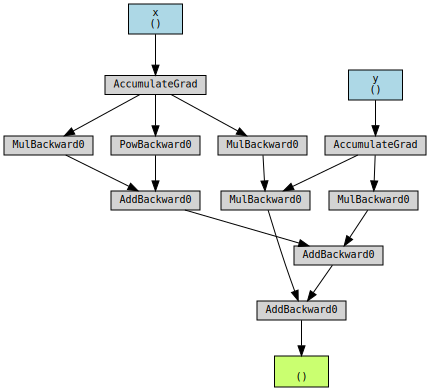

In [ ]:
from torchviz import make_dot
make_dot(z, params = {"x": x, "y": y})

### Linear Regression Example

We'll perform a simple linear regression task using autograd. We'll use a small housing dataset to predict prices.

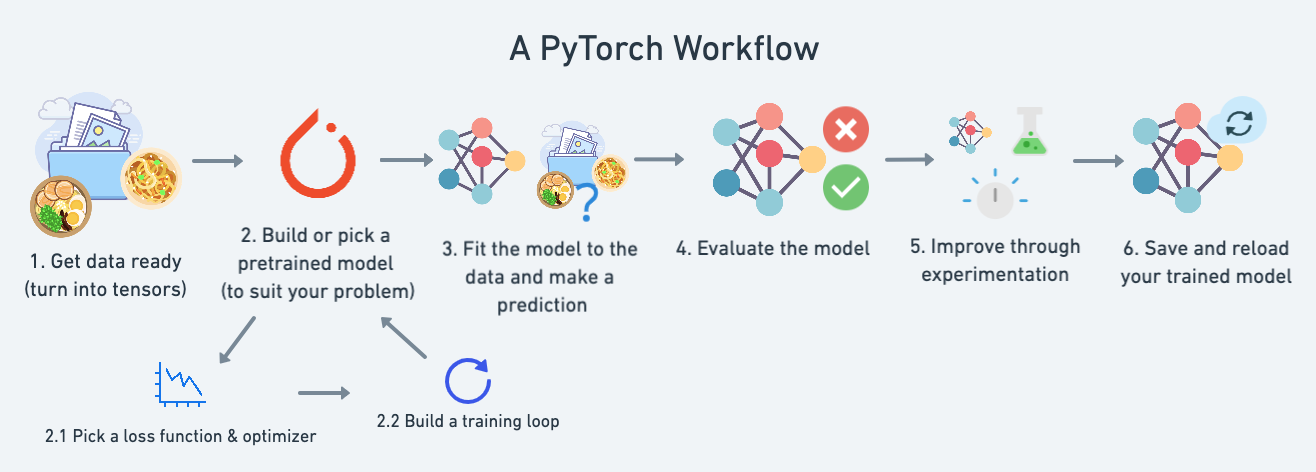

In [ ]:
import pandas as pd
train_data = pd.read_csv('/content/sample_data/california_housing_train.csv')
test_data = pd.read_csv('/content/sample_data/california_housing_test.csv')
# What is a train/test split?

In [ ]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


In [ ]:
train_data.shape # .shape can be used with pandas dataframes as well.

(17000, 9)

Now, let's code a simple model for linear regression using pytorch

In [ ]:
import torch
import torch.nn as nn

class LinearRegressionModel(nn.Module):
    def __init__(self, in_features):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(in_features, dtype=torch.float), requires_grad=True)
        self.bias = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)

    def forward(self, x):
        return x @ self.weights + self.bias # y = m*x + b

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = LinearRegressionModel(in_features=8).to(device)

In [ ]:
!pip install torchinfo -q

In [ ]:
from torchinfo import summary
summary(model, input_size=(8,))

Layer (type:depth-idx)                   Output Shape              Param #
LinearRegressionModel                    [1]                       9
Total params: 9
Trainable params: 9
Non-trainable params: 0
Total mult-adds (M): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

In [ ]:
X_train = train_data.drop('median_house_value', axis = 1)
y_train = train_data['median_house_value']
X_train = torch.Tensor(X_train.values).to(device)
y_train = torch.Tensor(y_train).to(device)

X_test = test_data.drop('median_house_value', axis = 1)
y_test = test_data['median_house_value']
X_test = torch.Tensor(X_test.values).to(device)
y_test = torch.Tensor(y_test).to(device)

In [ ]:
print(f"X shape: {X_train.shape}")
print(f"y shape: {y_train.shape}")

X shape: torch.Size([17000, 8])
y shape: torch.Size([17000])


In [ ]:
with torch.inference_mode():
    preds = model(X_train)

In [ ]:
preds.shape

torch.Size([17000])

In [ ]:
print(f"Predictions: {preds[:5]}")
print(f"Actual values: {y_train[:5]}")

Predictions: tensor([13760.1484, 18858.0430,  1740.1212,  3620.2729,  3477.6526],
       device='cuda:0')
Actual values: tensor([66900., 80100., 85700., 73400., 65500.], device='cuda:0')


How do we train our neural network now?
- The first step is to define a loss function and optimizer

In [ ]:
def mse_loss(predictions, targets):
    differences = predictions - targets
    squared_differences = differences ** 2
    mean_squared_error = squared_differences.mean()
    return mean_squared_error

optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

Adam Optimizer

Optimizers are responsible for updating a neural network's parameters (weights and biases) to minimize the loss function during training.


\begin{aligned}
v_t &= \beta_1 * v_{t-1} - (1 - \beta_1) * g_t \\
s_t &= \beta_2 * s_{t-1} - (1 - \beta_2) * g_t^2 \\
\Delta\omega_t &= -\eta\frac{v_t}{\sqrt{s_t + \epsilon}} * g_t \\
\omega_{t+1} &= \omega_t + \Delta\omega_t
\end{aligned}


- Momentum (vₜ): Tracks the moving average of gradients to help maintain direction and speed. Using β₁ (typically 0.9) means it keeps 90% of previous momentum and adds 10% of current gradient.


- Adaptive Learning (sₜ): Tracks the squared gradients to adjust step sizes. Parameters with frequent large gradients get smaller updates, while infrequent/small gradients get larger updates. β₂ (typically 0.999) controls this memory.


- Update (Δωₜ): Combines momentum with the adaptive scaling. The denominator √(sₜ + ε) makes updates smaller when past gradients were large, preventing overshooting.


- Final Step (ωₜ₊₁): Simply applies the calculated update to current parameters.

In [ ]:
torch.manual_seed(42) # Reproducibility
epochs = 1000
for epoch in range(epochs):
    model.train()
    preds = model(X_train)
    loss = mse_loss(preds, y_train)
    # backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss}")
        with torch.inference_mode():
            model.eval()
            test_pred = model(X_test)
            test_loss = mse_loss(test_pred, y_test)
            print(f"Test loss: {test_loss}")

Epoch: 0 | Loss: 53701824512.0
Test loss: 52450766848.0
Epoch: 100 | Loss: 51600859136.0
Test loss: 50372005888.0
Epoch: 200 | Loss: 49625600000.0
Test loss: 48414121984.0
Epoch: 300 | Loss: 47771680768.0
Test loss: 46572953600.0
Epoch: 400 | Loss: 46033707008.0
Test loss: 44843356160.0
Epoch: 500 | Loss: 44406489088.0
Test loss: 43220418560.0
Epoch: 600 | Loss: 42885054464.0
Test loss: 41699422208.0
Epoch: 700 | Loss: 41464619008.0
Test loss: 40275824640.0
Epoch: 800 | Loss: 40140570624.0
Test loss: 38945263616.0
Epoch: 900 | Loss: 38908461056.0
Test loss: 37703528448.0


Why is the model performing so poorly?

In [ ]:
train_data_scaled = (train_data - train_data.min()) / (train_data.max() - train_data.min())
test_data_scaled = (test_data - train_data.min()) / (train_data.max() - train_data.min())

In [ ]:
train_data_scaled

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,1.000000,0.175345,0.274510,0.147885,0.198945,0.028364,0.077454,0.068530,0.107012
1,0.984064,0.197662,0.352941,0.201608,0.294848,0.031559,0.075974,0.091040,0.134228
2,0.975100,0.122210,0.313725,0.018927,0.026847,0.009249,0.019076,0.079378,0.145775
3,0.974104,0.116897,0.254902,0.039515,0.052142,0.014350,0.037000,0.185639,0.120414
4,0.974104,0.109458,0.372549,0.038276,0.050435,0.017405,0.042921,0.098281,0.104125
...,...,...,...,...,...,...,...,...,...
16995,0.008964,0.854410,1.000000,0.058389,0.060987,0.025337,0.060516,0.128081,0.198764
16996,0.007968,0.866100,0.686275,0.061869,0.081782,0.033381,0.076303,0.139170,0.131960
16997,0.004980,0.988310,0.313725,0.070515,0.082247,0.034782,0.074823,0.174577,0.182682
16998,0.004980,0.984060,0.352941,0.070384,0.085506,0.036296,0.078441,0.102054,0.145981


Refer to [Scikit-learn's docs on preprocessing](https://scikit-learn.org/1.5/modules/preprocessing.html) for more info on how you can preprocess your data and some useful built-in tools, like the StandardScaler and MinMaxScaler

In [ ]:
X_train_scaled = torch.Tensor(train_data_scaled.drop('median_house_value', axis = 1).values)
X_test_scaled = torch.Tensor(test_data_scaled.drop('median_house_value', axis = 1).values)
y_train_scaled = torch.Tensor(train_data_scaled['median_house_value'])
y_test_scaled = torch.Tensor(test_data_scaled['median_house_value'])

In [ ]:
model = LinearRegressionModel(in_features=8)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
model.train()
epochs = 1000

train_losses = []
test_losses = []

for epoch in range(epochs):
    preds = model(X_train_scaled)
    loss = mse_loss(preds, y_train_scaled)
    train_losses.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    with torch.inference_mode():
        test_pred = model(X_test_scaled)
        test_loss = mse_loss(test_pred, y_test_scaled)
        test_losses.append(test_loss.item())
        if epoch % 100 == 0:
            print(f"Epoch: {epoch} | Train Loss: {loss} | Test Loss: {test_loss}")

Epoch: 0 | Train Loss: 0.21479733288288116 | Test Loss: 0.20923136174678802
Epoch: 100 | Train Loss: 0.11090950667858124 | Test Loss: 0.10512320697307587
Epoch: 200 | Train Loss: 0.09244022518396378 | Test Loss: 0.08671043813228607
Epoch: 300 | Train Loss: 0.0834408774971962 | Test Loss: 0.07823074609041214
Epoch: 400 | Train Loss: 0.07612616568803787 | Test Loss: 0.0714745968580246
Epoch: 500 | Train Loss: 0.0697864517569542 | Test Loss: 0.0656508356332779
Epoch: 600 | Train Loss: 0.06419005244970322 | Test Loss: 0.060523610562086105
Epoch: 700 | Train Loss: 0.059210896492004395 | Test Loss: 0.055969737470149994
Epoch: 800 | Train Loss: 0.05476587265729904 | Test Loss: 0.051909174770116806
Epoch: 900 | Train Loss: 0.05079356208443642 | Test Loss: 0.04828337952494621


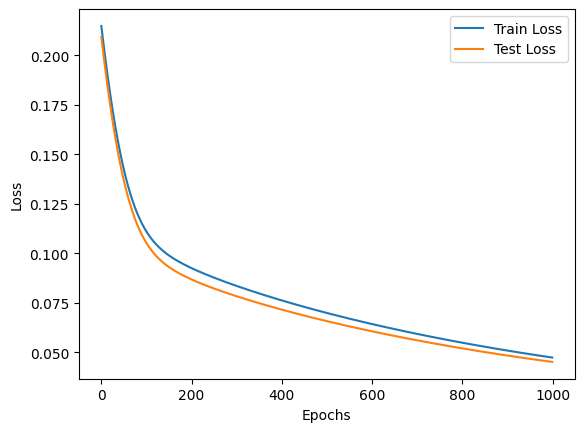

In [ ]:
# Plotting the loss
import matplotlib.pyplot as plt

plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Let's verify this with the original dataset

In [ ]:
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0
...,...,...,...,...,...,...,...,...,...
2995,-119.86,34.42,23.0,1450.0,642.0,1258.0,607.0,1.1790,225000.0
2996,-118.14,34.06,27.0,5257.0,1082.0,3496.0,1036.0,3.3906,237200.0
2997,-119.70,36.30,10.0,956.0,201.0,693.0,220.0,2.2895,62000.0
2998,-117.12,34.10,40.0,96.0,14.0,46.0,14.0,3.2708,162500.0


In [ ]:
row = test_data.iloc[0]
print(row)

longitude               -122.0500
latitude                  37.3700
housing_median_age        27.0000
total_rooms             3885.0000
total_bedrooms           661.0000
population              1537.0000
households               606.0000
median_income              6.6085
median_house_value    344700.0000
Name: 0, dtype: float64


In [ ]:
row_scaled = (row - train_data.min()) / (train_data.max() - train_data.min())
row_scaled = torch.Tensor(row_scaled.drop('median_house_value').values)
with torch.inference_mode():
    pred_house_value = model(row_scaled)
print(pred_house_value, y_test_scaled[0])
unscaled_house_value = pred_house_value * (train_data['median_house_value'].max() - train_data['median_house_value'].min()) + train_data['median_house_value'].min()
print(f"Predicted house value: {unscaled_house_value.item()}")

tensor([0.4172]) tensor(0.6798)
Predicted house value: 217362.15625


In [ ]:
row_scaled

tensor([0.2291, 0.5133, 0.5098, 0.1024, 0.1024, 0.0430, 0.0995, 0.4213])

The model still isn't performing that well - what could the possible reasons be?

Let's try coding a slightly more complicated neural network

### Using built-in modules from pytorch
torch.nn contains several useful built-in modules to easily construct complex neural networks, like
- nn.Linear - linear layers, as described during the session
- nn.Conv2D - convolutional layers
- nn.RNN, nn.GRU, nn.LSTM - to construct recurrent neural networks
- nn.BatchNorm, nn.LayerNorm, etc. - normalization
- nn.MultiheadAttention, nn.Transformer, ...

Several loss functions,
- nn.CrossEntropyLoss, nn.MSELoss, ...

Refer to [this](https://pytorch.org/docs/stable/nn.html) for a more comprehensive list

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import os
import matplotlib.pyplot as plt
import numpy as np

# Set device and hyperparameters
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
batch_size = 64
learning_rate = 0.001
epochs = 10
checkpoint_dir = 'checkpoints'
os.makedirs(checkpoint_dir, exist_ok=True)

In [ ]:
class MNISTNet(nn.Module):
    def __init__(self):
        super(MNISTNet, self).__init__()
        self.flatten = nn.Flatten()
        self.layers = nn.Sequential(
            nn.Linear(28 * 28, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        return self.layers(x)

In [ ]:
# Initialize model, optimizer, and criterion
model = MNISTNet().to(device)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()

For an M-class classification problem, cross entropy loss is defined as:

$\mathcal{L}_{CE} = -\sum_{c=1}^{M} y_c \log(\hat{y}_c)$

In pytorch, it is implemented [slightly differently](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html):

$\mathcal{L}_{CE} = -\sum_{c=1}^M y_c \log\left(\frac{\exp(x_c)}{\sum_{k=1}^M \exp(x_k)}\right)$

where,

- $\sum_{c=1}^M$: Sum over all M classes

- $y_c$: Ground truth label (usually 0 or 1 in one-hot encoding)

- $x_c$: Raw logit (model output) for class c

- $\exp(x_c)$: Exponential of logit for class c

- $\sum_{k=1}^M \exp(x_k)$: Sum of exponentials for all classes (softmax denominator)

- $\frac{\exp(x_c)}{\sum_{k=1}^M \exp(x_k)}$: Softmax function that converts logits to probabilities

- (-) Negative sign makes loss positive (since log of probability is negative)


In [ ]:
batch_size = 128

transform = transforms.Compose([
    transforms.ToTensor(), # Already scales the values to 0-1
    transforms.Normalize((0.1307,), (0.3081,))
])

train_dataset = datasets.MNIST('./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST('./data', train=False, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
import math
print(f"Size of train dataset: {len(train_dataset)}, n_batches: {math.ceil(len(train_dataset)/128)}")
print(f"Size of test dataset: {len(test_dataset)}, n_batches: {math.ceil(len(test_dataset)/128)}")

Size of train dataset: 60000, n_batches: 469
Size of test dataset: 10000, n_batches: 79


Visualization saved as 'mnist_samples.png'


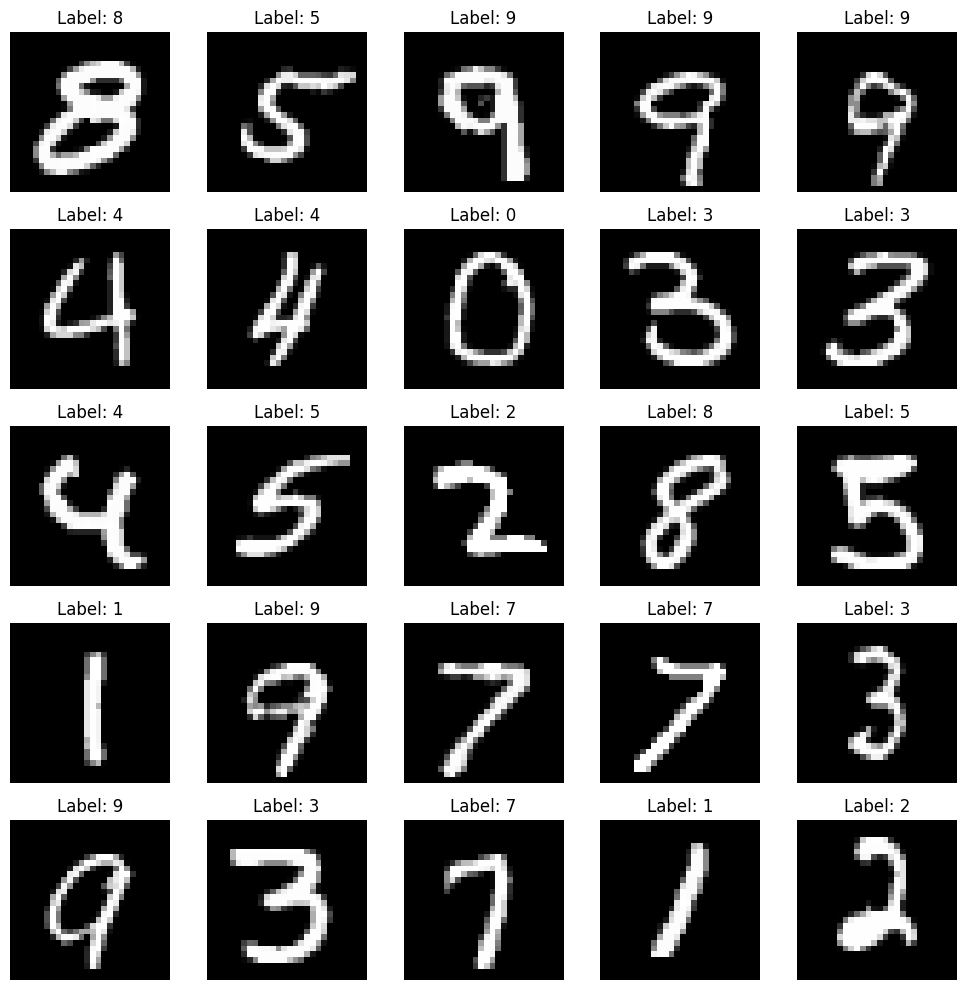

In [ ]:
# Data visualization function
def visualize_dataset(dataset, num_images = 25, model = None):
    # Create a figure with a grid of subplots
    fig = plt.figure(figsize=(10, 10))
    rows = int(np.sqrt(num_images))
    cols = int(np.sqrt(num_images))

    # Plot random images from the dataset
    for i in range(num_images):
        idx = np.random.randint(len(dataset))
        img, label = dataset[idx]

        ax = fig.add_subplot(rows, cols, i + 1)
        ax.imshow(img.squeeze().numpy(), cmap='gray')
        if model:
            with torch.inference_mode():
                pred = model(img.to(device))
            pred = torch.argmax(pred, dim = 1).item()
            ax.set_title(f'Label: {label}, Pred: {pred}')
        else:
            ax.set_title(f'Label: {label}')
        ax.axis('off')

    plt.tight_layout()
    plt.savefig('mnist_samples.png')

    print(f"Visualization saved as 'mnist_samples.png'")

visualize_dataset(train_dataset)

In [ ]:
# Training function
def train(model, train_loader, optimizer, criterion, device, epoch, print_every = 50):
    model.train()
    running_loss = 0.0
    epoch_loss = 0.0

    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)

        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        epoch_loss += loss.item()

        if batch_idx % print_every == print_every - 1:
            print(f'Epoch {epoch}, Batch {batch_idx+1}, Loss: {running_loss/print_every:.4f}')
            running_loss = 0.0

    return epoch_loss / len(train_loader)

In [ ]:
# Testing function
def test(model, test_loader, criterion, device):
    model.eval()
    test_loss = 0
    correct = 0

    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += criterion(output, target).item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader)
    accuracy = 100. * correct / len(test_loader.dataset)

    print(f'\nTest set: Average loss: {test_loss:.4f}, '
          f'Accuracy: {correct}/{len(test_loader.dataset)} '
          f'({accuracy:.2f}%)\n')

    return test_loss, accuracy

### [Saving and loading models](https://pytorch.org/tutorials/beginner/saving_loading_models.html)


In [ ]:
# Save checkpoint
def save_checkpoint(model, optimizer, epoch, accuracy, filename):
    checkpoint = {
        'epoch': epoch,
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'accuracy': accuracy
    }
    torch.save(checkpoint, filename)
    print(f"Checkpoint saved: {filename}")

# Load checkpoint
def load_checkpoint(model, optimizer, filename):
    if os.path.exists(filename):
        checkpoint = torch.load(filename)
        model.load_state_dict(checkpoint['model_state_dict'])
        optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
        epoch = checkpoint['epoch']
        accuracy = checkpoint['accuracy']
        print(f"Checkpoint loaded: {filename}")
        return epoch, accuracy
    raise FileNotFoundError(f"The file {filename} does not exist")

In [ ]:
# Lists to store training history
train_losses = []
val_accuracies = []
test_losses = []

n_epochs = 1
best_accuracy = 0

# Training loop
for epoch in range(n_epochs):
    print(f'\nEpoch {epoch+1}/{n_epochs}')
    epoch_loss = train(model, train_loader, optimizer, criterion, device, epoch)
    test_loss, accuracy = test(model, test_loader, criterion, device)

    # Store training history
    train_losses.append(epoch_loss)
    test_losses.append(test_loss)
    val_accuracies.append(accuracy)

    # Save checkpoint
    save_checkpoint(
        model, optimizer, epoch, accuracy,
        f'{checkpoint_dir}/checkpoint_epoch_{epoch}.pth'
    )

    # Save best model
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        save_checkpoint(
            model, optimizer, epoch, accuracy,
            f'{checkpoint_dir}/best_model.pth'
        )

    # Save latest checkpoint (for resuming training)
    save_checkpoint(
        model, optimizer, epoch, accuracy,
        f'{checkpoint_dir}/latest_checkpoint.pth'
    )



Epoch 1/5
Epoch 0, Batch 50, Loss: 0.6463
Epoch 0, Batch 100, Loss: 0.3090
Epoch 0, Batch 150, Loss: 0.2330
Epoch 0, Batch 200, Loss: 0.1783
Epoch 0, Batch 250, Loss: 0.1790
Epoch 0, Batch 300, Loss: 0.1577
Epoch 0, Batch 350, Loss: 0.1481
Epoch 0, Batch 400, Loss: 0.1390
Epoch 0, Batch 450, Loss: 0.1248

Test set: Average loss: 0.1059, Accuracy: 9666/10000 (96.66%)

Checkpoint saved: checkpoints/checkpoint_epoch_0.pth
Checkpoint saved: checkpoints/best_model.pth
Checkpoint saved: checkpoints/latest_checkpoint.pth

Epoch 2/5
Epoch 1, Batch 50, Loss: 0.1024
Epoch 1, Batch 100, Loss: 0.1008
Epoch 1, Batch 150, Loss: 0.0972
Epoch 1, Batch 200, Loss: 0.1024


KeyboardInterrupt: 

Visualization saved as 'mnist_samples.png'


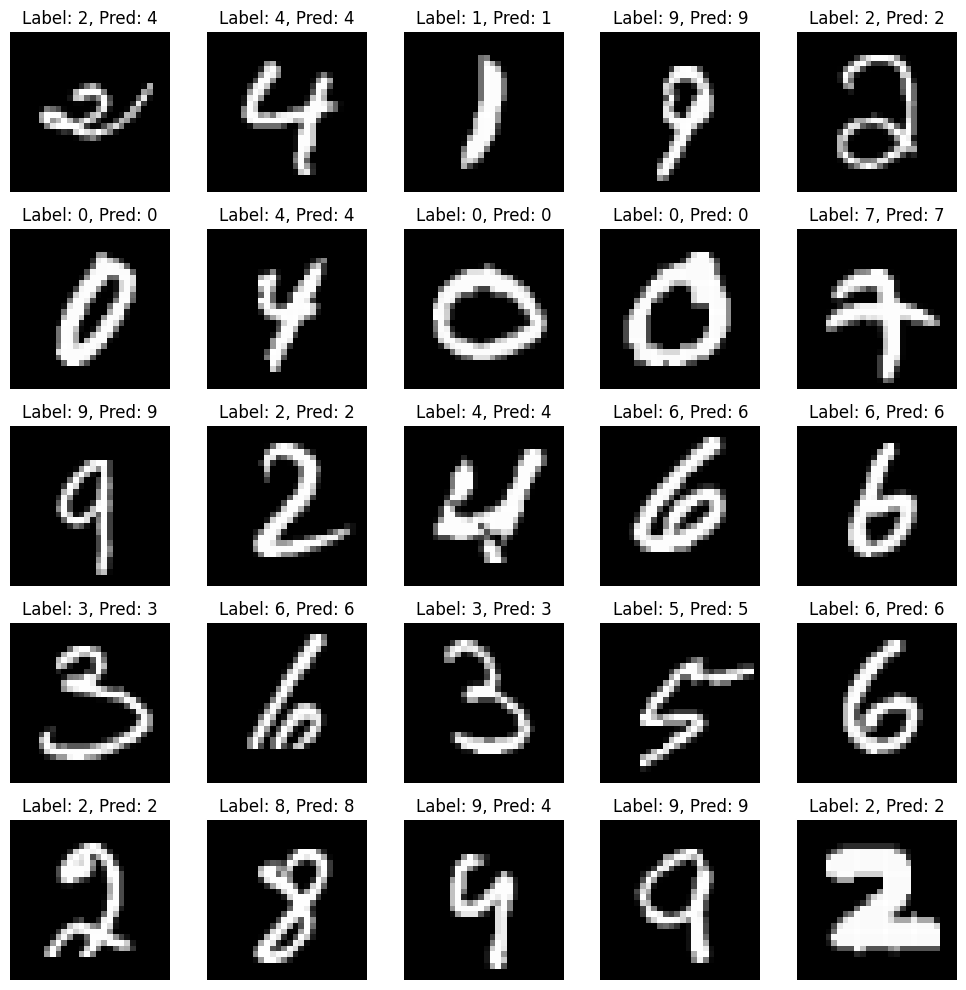

In [ ]:
visualize_dataset(train_dataset, model = model)

Visualizing neural networks: https://playground.tensorflow.org/

### Let's come back to the california housing dataset now (Exercise)

Defining the model:

In [ ]:
class HousingNet(nn.Module):
    def __init__(self):
        super(HousingNet, self).__init__()
        # Define the layers of the neural network

    def forward(self, x):
        # Define the forward pass of the neural network

[Creating our own pytorch dataset](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html)

In [ ]:
from torch.utils.data import Dataset

class HousingDataset(Dataset):
    def __init__(self, data, target):
        self.data = data
        self.target = target

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx], self.target[idx]

Training loop

In [ ]:
n_epochs = 1000
train_losses = []
val_losses = []

model = HousingNet().to(device)
criterion = nn.MSELoss()
learning_rate = 0.001
optimizer = torch.optim.Adam(params = model.parameters(), lr = learning_rate)

train_dataset = HousingDataset(X_train_scaled, y_train_scaled)
test_dataset = HousingDataset(X_test_scaled, y_test_scaled)

batch_size = 128

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
for epoch in range(n_epochs):
    # Training phase
    model.train()
    train_loss = 0
    for X_batch, y_batch in train_loader:
        # Forward pass
        X_batch = X_batch.to(device)
        y_batch = y_batch.to(device)
        y_pred =
        loss =

        # Backward pass


        train_loss += loss.item()

    # Calculate average training loss for the epoch
    train_loss = train_loss / len(train_loader)
    train_losses.append(train_loss)

    # Validation phase
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            X_batch = X_batch.to(device)
            y_batch = y_batch.to(device)
            y_pred =
            val_loss +=

    val_loss = val_loss / len(test_loader)
    val_losses.append(val_loss)

    # Print progress
    if (epoch + 1) % 100 == 0:  # Print every 10 epochs
        print(f'Epoch [{epoch+1}/{n_epochs}], '
              f'Train Loss: {train_loss:.4f}, '
              f'Val Loss: {val_loss:.4f}')

print('Training finished!')